---------------- **Programming for Psychologists - Home Assignment** ----------------

Name: Kiki Beekman\
Date: 19-11-2024\
Vrije Universiteit Amsterdam

*Data compatible with this code can be found on [Neurosynth](https://neurosynth.org/). The specific data on mental imagery that was used in this project can be found [here](https://neurosynth.org/analyses/terms/mental%20imagery/).*

*NB: All code in this notebook is formatted using the "Black formatter" extension*

**Step 1: Download the data**\
On [Neurosynth](https://neurosynth.org/), download the Structural MRI data (anatomical) and the Functional data (uniformity test) of your cognitive concept/clinical term of interest. Place the two files into a designated folder that also contains this notebook, both with the **.nii.gz** extension and with their original names

**Step 2: Set up your virtual environment**\
Create a new Conda environment with a name of your choosing and download the desired packages

**Step 3: Write your code**\
*Step 3.1 - Create a new Jupyter notebook*

*Step 3.2 - Localize data*

The `glob.glob()` function is used to automatically locate the necessary fMRI data. The function works by searching within the current working directory and creating a list of all files that end in the specified extension, in this case **.nii.gz**.

In [6]:
# Import necessary packages
import glob

# Get all files within the current working directory that have the .nii.gz extension
files = glob.glob("*.nii.gz")

*Step 3.3 - Visualize the data*

Before the data can be visualized, the datafiles first need to be checked and allocated. If either the anatomical datafile or the functional fMRI datafile cannot be found within the current working directory, an `Exception` is raised. Once the datafiles are correctly allocated, the data is used to create the anatomical and functional fMRI image using the `nibabel` package. The `nilearn` package is then used to plot the images. The `matplotlib` package is used to make final adjustments to the lay-out of the figures.

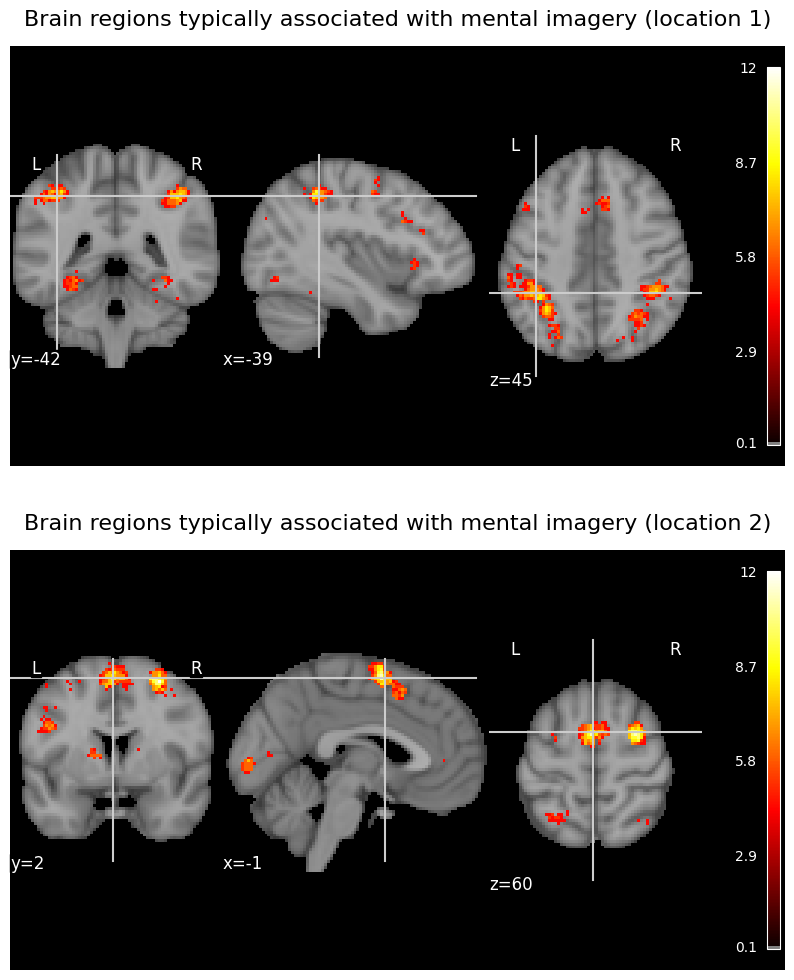

In [8]:
# Import necessary packages
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt

# Assign file names to the necessary files
anatomical_file = ""
uniformity_file = ""
for file in files:
    if "anatomical" in file:
        anatomical_file = file
    elif "uniformity" in file:
        uniformity_file = file

# Raise an exception if either necessary file is not found
if not anatomical_file or not uniformity_file:
    raise Exception(
        "You do not have the required files within your current working directory"
    )

# Load the anatomical and functional images
anatomical_img = nib.load(anatomical_file)
functional_img = nib.load(uniformity_file)

# Define 3D locations of interest
loc_1 = (-39, -42, 45)
loc_2 = (-1, 2, 60)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Use plot_stat_map to visualize the plots
plot1 = plotting.plot_stat_map(
    stat_map_img=functional_img,  # Define the statistical map image
    bg_img=anatomical_img,  # Define the background image
    cut_coords=loc_1,  # Define the coordinates of interest within the brain
    threshold=0.1,  # Exclude values below the indicated level
    cmap="hot",  # Set the colormap
    axes=axes[0],
    figure=fig,
)

plot2 = plotting.plot_stat_map(
    stat_map_img=functional_img,
    bg_img=anatomical_img,
    cut_coords=loc_2,
    threshold=0.1,
    cmap="hot",
    axes=axes[1],
    figure=fig,
)

# Use matplotlib to tweak lay-out, in this case implement customized titles
axes[0].set_title(
    "Brain regions typically associated with mental imagery (location 1)",
    fontsize=16,
    color="black",
    backgroundcolor="white",
    pad=15,
)

axes[1].set_title(
    "Brain regions typically associated with mental imagery (location 2)",
    fontsize=16,
    color="black",
    backgroundcolor="white",
    pad=15,
)


# Show plots
plotting.show()

*Step 3.4 - Plot the data*

Lastly, a histogram is created based on the fMRI data using `matplotlib`. To be able to plot the histogram, the data first has to be extracted from the functional image, after which only the positive values are selected. The histogram shows the frequency of signal strengths (voxel intensities) throughout the fMRI image.

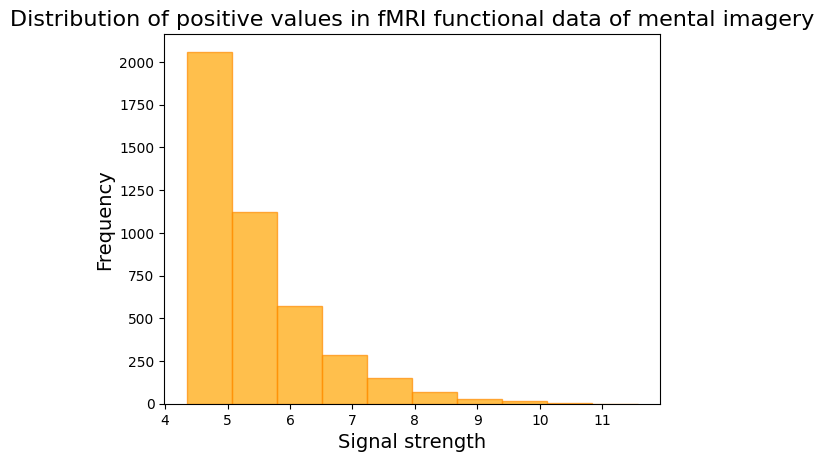

In [9]:
# Extract data from the functional image
functional_data = functional_img.get_fdata()

# Get only the positive values from the functional data
positive_values = functional_data[functional_data > 0]

# Plot the histogram
plt.figure()
plt.hist(positive_values, color="orange", edgecolor="darkorange", alpha=0.7)
plt.title(
    "Distribution of positive values in fMRI functional data of mental imagery",
    fontsize=16,
)
plt.xlabel("Signal strength", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()